# <img src="./assets/course-icon.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

#### <a href="https://taldatech.github.io">Tal Daniel</a>

## Tutorial 04 - Differentiation & Autograd
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Matrix Calculus](#-Matrix-Calculus----Vector-&-Matrix-Derivatives)
* [Lagrange Multipliers](#-Lagrange-Multipliers)
* [Automatic Differentiation](#-Automatic-Differentiation-(AutoDiff,-AD))
    * [AutoDiff Forward Mode](#-AutoDiff-Forward-Mode)
    * [AutoDiff Reverse Mode](#-AutoDiff-Reverse-Mode)
* [PyTorch's Autograd](#-PyTorch's-Autograd)
    * [Tensor](#Tensor)
    * [Gradients](#Gradients)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
# %matplotlib notebook
%matplotlib inline

## <img src="https://img.icons8.com/dusk/64/000000/scissors.png" style="height:50px;display:inline"> Matrix Calculus -  Vector & Matrix Derivatives
---
* We will use most of the derivatives "as is" without derivation.
* A good reference: **<a href="http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf">The Matrix Cookbook</a>**
* <img src="https://img.icons8.com/plasticine/100/000000/error.png" style="height:20px;display:inline"> **REMEMBER** - ALWAYS write the dimensions of each component and identify whether the expression is a **matrix, vector or scalar**!

### <img src="https://img.icons8.com/bubbles/100/000000/multiply.png" style="height:50px;display:inline"> Derivative of Vector Multiplication
---
* Let $x, a \in \mathbb{R}^N \rightarrow x, a$ are vectors
* $\frac{\partial x^Ta}{\partial x} = \frac{\partial a^Tx}{\partial x} = a$
    * $x^Ta = a^Tx$ are **scalars**
    * $a$ is a **vector**
    * Derivation: $$ f = x^Ta = [x_1, x_2, ..., x_n] \begin{bmatrix} a_{1} \\a_{2} \\ \vdots \\a_{n}\end{bmatrix}  = a_1 x_1 + a_2 x_2 + ... + a_n x_n = \sum_{i=1}^n a_i x_i$$ $$\frac{\partial x^Ta}{\partial x} = \begin{bmatrix}\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix} = \begin{bmatrix} a_{1} \\ a_{2} \\ \vdots \\ a_{n} \end{bmatrix} = a $$

#### <img src="https://img.icons8.com/cotton/64/000000/bunch-of-keys-1.png" style="height:30px;display:inline"> Common Derivatives
---
* $\nabla_x Ax = A^{T}$
* $\nabla_x x^{T} A x = (A + A^{T}) x$ 
    * If $W$ is **symmetric**:
        * $\frac{\partial}{\partial s} (x-As)^T W (x-As) = -2A^TW(x-As)$
        * $\frac{\partial}{\partial x} (x-As)^T W (x-As) = 2W(x-As)$
* $\frac{\partial}{\partial A} \ln |A| = A^{-T}$
* $\frac{\partial}{\partial A} Tr[AB] = B^{T}$

### <img src="https://img.icons8.com/dusk/64/000000/link.png" style="height:50px;display:inline"> The Chain Rule
---
* Let $$ f(x) = h(g(x))$$ $$x \in \mathbb{R}^n $$ $$ f, g : \mathbb{R}^n \rightarrow \mathbb{R}$$ $$ h: \mathbb{R} \rightarrow \mathbb{R}$$
* $ \nabla f = h' \cdot \nabla g$

## <img src="https://img.icons8.com/office/80/000000/conflict.png" style="height:50px;display:inline"> Constrained Optimization
---
### <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Lagrange Multipliers
---
* A method for optimization with **equality constraints**
* The general case: $$ \min f(x,y) $$ $$ \textit{s.t. (subject to)}: g(x,y)=0 $$
* The *Lagrange* function (*Lagrangian*) is defined by: $$ \mathcal{L}(x,y,\lambda) = f(x,y) -\lambda \cdot g(x,y) $$

* Geometric Intuition: let's look at the following figure where we wish to **maximize** $f(x,y)$ s.t $g(x,y)=0$ - <br>
<img src="./assets/lagrange.jpg" style="height:400px"> <br>

* To maximize $f(x,y)$ subject to $g(x,y)=0$ is to find the largest value $c \in \{7,8,9,10,11\}$ such that the level curve (contour) $f(x,y) = c$ intersects with $g(x,y)=0$
* It happens when the curves just touch each other
    * When they have a common tangent line
* Otherwise, the value of $c$ should be increased

* Since the gradient of a function is **perperndicular** to the contour lines:
    * The *contour lines* of $f$ and $g$ are **parallel** iff the *gradients* of $f$ and $g$ are **parallel**
    * Thus, we want points $(x,y)$ where $g(x,y) = 0$ and $$\nabla_{x,y}f(x,y)=\lambda \nabla_{x,y} g(x,y) $$
        * $\lambda$ - "The Lagrange Multiplier" is required to adjust the **magnitudes** of the (parallel) gradient vectors.

###  <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"><img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Multiple Constraints
---
* Extenstion of the above for problems with **multiple constraints** using a similar argument
* The general case: minimize $f(x)$ s.t. $g_i(x)=0$, $i = 1,2,..., m$ 
* The **Lagrangian** is a weighted sum of objective and constraint functions: $$ \mathcal{L}(x, \lambda_1, ..., \lambda_m) = f(x) - \sum_{i=1}^m \lambda_i g_i(x)$$
    * $\lambda_i$ is the Lagrange multipler associated with $g_i(x) = 0$

* The **solution** is obtained by solving the (unconstrained) optimization problem: $$\nabla_{x, \lambda_1, ..., \lambda_m}\mathcal{L}(x, \lambda_1, ..., \lambda_m) = 0 \iff \begin{cases}
    \nabla_x \big[f(x) - \sum_{i=1}^m \lambda_ig_i(x) = 0 \big]\\
    g_1(x) = ... = g_m(x) = 0
  \end{cases}$$
  * Amounts to solving $d + m$ equations in $d+m$ unknowns
      * $d = |x|$ is the dimension of $x$

## <img src="https://img.icons8.com/dusk/64/000000/graph.png" style="height:50px;display:inline"> Automatic Differentiation (AutoDiff, AD)
---
* Automatic differntiation is about computing derivatives of functions encoded as computer programs.
* It is a key component in every deep learning framework.

### <img src="https://img.icons8.com/dusk/64/000000/close-window.png" style="height:50px;display:inline"> AutoDiff Is NOT Numerical Differentiation
---
* Numerical differentiation is the technique that comes from the standard definition of a derivative: $$ \frac{df(x)}{dx}= \lim_{h \to 0} \frac{f(x+h )- f(x)}{h}$$
* You can clearly approximate the left hand side by evaluating the right hand side at a small but non-zero $h$.
* It is very easy to code! but it costs $O(n)$ evaluations of $f$ for gradients in $n$ dimensions, and prone to errors (e.g., truncation error, percision errors).

* Note: in the *center difference* version the errors are usually smaller: $$\frac{df(x)}{dx}= \lim_{h \to 0} \frac{f(x+h )- f(x-h)}{2h} $$

Let's look at the following example:
$$ \text{func}(x) = 3x^3 -5x^2. $$ The derivative: $$ \text{func_der}(x) = 9x^2 -10x $$

In [1]:
def func(x):
    return 3 * x ** 3 - 5 * x ** 2

def func_der(x):
    return 9 * x ** 2 -10 * x

Let's take a point  $x=1.5$. The derivative at this point is: $$ \text{func_der}(x=1.5) = 5.25 $$ This informs us that the slope of the tangent line to the graph of $\text{func}$ is 5.25. If we use the standard definition, we need to use a limit to reach this value. Let's see it.

Text(0.5, 0.65, 'derivative 5.25')

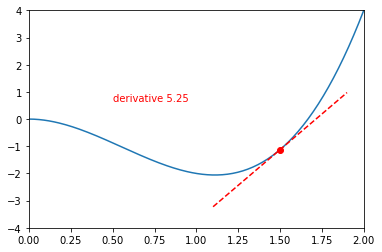

In [5]:
x = np.linspace(0,2,200)
y = func(x)
xprime = np.linspace(1.1,1.9)
yprime = (xprime - 1.5) * func_der(1.5)  + func(1.5)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-4, 4))
_,_,_, point, line = ax.plot(x,y, xprime, yprime, 'r--', [1.5], [func(1.5)], 'ro', [],[], 'ko', [], [], 'k-')
text = ax.text(0.5, 1, "")
ax.text(0.5, 0.65, "derivative 5.25", color="r")

In [6]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    text.set_text("")
    return (point, line, text)
def animate(i):
    if (i < 45):
        pt = 1.495 - 0.495 * (60 - i) / 60
    elif (i < 75):
        pt = 1.495 - 0.495 * (16.25 - (i-45)/2 ) / 75
    elif (i<80):
        pt = 1.495
    elif (i < 125):
        pt = 1.495 + 0.495 * (140 - i) / 60
    elif (i < 155):
        pt = 1.495 + 0.495 * (16.25 - (i-125)/2 ) / 75
    else:
        pt = 1.505
    x = np.linspace(0.8, 1.99)
    text.set_text("slope of the arc {0:.4f}".format((func(1.5) - func(pt))/(1.5 - pt)))
    y = (x - 1.5) * (func(1.5) - func(pt))/(1.5 - pt) + func(1.5)
    line.set_data(x, y)
    point.set_data([pt], [func(pt)])
    return (point, line, text)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=160, repeat=True, blit=True)
HTML(anim.to_jshtml())

### <img src="https://img.icons8.com/dusk/64/000000/close-window.png" style="height:50px;display:inline"> AutoDiff Is NOT Symbolic Differentiation
---
* Symbolic differentiation is the technique you were taught in Calculus, for example: $$ \frac{d(u(x) + v(x))}{dx} = \frac{du(x)}{dx} + \frac{dv(x)}{dx} $$ $$\frac{d(u(x)v(x))}{dx} = v(x)\frac{du(x)}{dx} + u(x)\frac{dv(x)}{dx}$$

* This technique is mechanical, given access to the expression that defines the function of interest, so there is no reason it could not be carried out by computer.

* One problem with symbolic differentiation is that you don't know how to calculate the derivative of a data structure, e.g., what is the derivative of the following: $$ \frac{d(\text{draw-point}(x,y))}{dx} $$

* Another problem is that careless symbolic differentiation can easily produce exponentially large symbolic expressions which take exponentially long to evaluate. 
* For example, for the derivative of multiplication above, on the right hand side, $u(x)$ and $du(x)/dx$ appear separately. If you just proceed to symbolically differentiate $u$ and plug its derivative into the appropriate place, you will have **duplicated any computation that appears in common** between $u$ and $du$.

## <img src="https://img.icons8.com/cute-clipart/64/000000/fast-forward.png" style="height:50px;display:inline"> AutoDiff Forward Mode
---
* In principle, exponentially large expressions should have lots of **duplication**, so it ought to be possible to simplify it to something fast afterwards—if you can store it in memory long enough. 
* You can think of (forward mode) automatic differentiation as a way to organize symbolic differentiation to retain the sharing of intermediate results between the main computation and the derivative.
* AutoDiff comes in two basic flavors: *forward* and *reverse*. The easier basic flavor to describe and understand (and implement and use) is called **forward mode**, which computes **directional derivatives**.
* In Machine/Deep learning, we are actually using **reverse mode** for the backpropagation. 

### <img src="https://img.icons8.com/nolan/64/sorting-arrows-horizontal.png" style="height:50px;display:inline"> AutoDiff Forward Mode Computes Directional Derivatives
---
* To do forward mode AD on a program, you need to do a non-standard interpretation of the program.
* Define **“dual numbers”** as formal **truncated Taylor series** of the form $x + \epsilon x'$.
* Define arithmetic on dual numbers by $\epsilon^2 = 0$, and by interpreting *any* non-dual number $y$ as $y + \epsilon \cdot 0$. This yields: $$ (x + \epsilon x') + (y + \epsilon y') = (x+y) + \epsilon(x' + y') $$ $$  (x + \epsilon x')(y + \epsilon y') = xy +\epsilon(x'y + xy')$$
    * Notice there is no quadratic term in the second equation as $\epsilon^2=0$.
    * The coefficients of $\epsilon$ should look familiar: they are just the corresponding symbolic derivative rules.
* **WHY** are we doing this? We are basically setting up a regime where: $$ f(x+\epsilon x') = f(x) +\epsilon f'(x)x'. $$
    * In other words, these dual numbers are just data structures for carrying the derivative around together with the undifferentiated answer (called the *primal*). 

#### What About The Chain Rule?
---
* It still works! (start from the inside) $$ f(g(x +\epsilon x')) = f(g(x) +\epsilon g'(x)x') $$ $$ = f(g(x)) + \epsilon f'(g(x))g'(x)x' $$
    *  The coefficient of $\epsilon$ on the right hand side is exactly the derivative of the composition of $f$ and $g$.
* This means that we can extract the derivative of a function of interest by evaluating it in this non-standard way on an initial input with a 1 coefficient for $\epsilon$: $$ \left.\frac{df(x)}{dx} \right|_x = \text{coefficient-of-epsilon}(\text{dual-version}(f)(x+1\cdot \epsilon)). $$
* This also generalizes naturally to taking directional derivatives of $\mathcal{R}^n \to \mathcal{R}^m$

* This mechanism works for any function that can be composed out of the primitive operations that we have extended to dual numbers. 
* It turns every arithmetic operation into a fixed number of new arithmetic operations, so the arithmetic cost goes up by a small constant factor.
* This technique also naturally extends to arbitrary program constructs—dual numbers are just data, so things like data structures can just contain them. 
    * As long as no arithmetic is done on the dual number, it will just sit around and happily be a dual number; and if it is ever taken out of the data structure and operated on again, then the differentiation will continue.

#### Jacobian Matrix Perspective of Forward AutoDiff
---
* Another way to look at forward mode of a function $f: \mathcal{R}^n \to \mathcal{R}^m$ is to consider the **Jacobian** (matrix of partial derivatives) $J_x f \in \mathcal{R}^{m \times n}$ at some point $x \in \mathcal{R}^n$.
* The function $f$ consists of a sequence of primitive operations applied to various data in its internal storage.
* If we call this sequence $f_k \circ ... \circ f_3 \circ f_2 \circ f_1$ (for k primitive operations, with data flowing from right to left), and we define the the partial-result function $f^i$ as: $$ f^i = f_i \circ ... \circ f_3 \circ f_2 \circ f_1,$$ then the full Jacobian of $f$ decomposes as: $$ J_xf = J_{f^{k-1}(x)}f_k \cdot ... J_{f^{2}(x)}f_3 \cdot J_{f^{1}(x)}f_2 \cdot J_{x}f_1 .$$
* The nice thing about this decomposition is that even though the full Jacobian $Jf$ may be a horrible huge dense matrix, each of the pieces $Jf_i$ is necessarily **very sparse**, because each primitive $f_i$ only operates on a tiny part of the data.
*  So we can look at the result of forward-mode automatic differentiation as an implicit representation of the point-indexed family of matrices $J_xf$ in the form of a program that computes matrix-vector products $J_xf\cdot v$ given $x$ and $v$.

* Forward Mode **Advantage**: for any additional *output* the additional required number of steps is just 1 ($\frac{\partial y_2}{\partial x_1}$ below).
* Forward Mode **Disadvantage**: for any additional *input*, we need to perform the whole computation again ($\frac{\partial y}{\partial x_2}$ below).

<img src='./assets/autodiff_fm_add_output.PNG' style="height:400px">

## <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> AutoDiff Reverse Mode
---
* In optimizing neural networks, unlike *forward mode*, gradients of functions $f:\mathcal{R}^n \to \mathcal{R}$ are generally much more valuable: they enable multidimensional optimization methods, multiparameter sensitivity analyses, simulations of systems following potentials, etc.
* The concept for a gradient of $f:\mathcal{R}^n \to \mathcal{R}$ generalizes trivially to directional gradients of $g:\mathcal{R}^n \to \mathcal{R}^m$.
* You can read more about **reverse mode**, which computes **directional gradients** <a href="https://alexey.radul.name/ideas/2013/introduction-to-automatic-differentiation">here</a>.

### <img src="https://img.icons8.com/nolan/64/sorting-arrows-horizontal.png" style="height:50px;display:inline"> AutoDiff Reverse Mode Computes Directional Gradients
---
* The **directional gradient** is a symmetric concept to **directional derivative**: where the directional **derivative** in the direction $v$ is $J_xf\cdot v$, the directional **gradient** is $u^T \cdot J_xf$.
* The decomposition of $Jf$ as introduced in the forward mode is still a good representation. However, unlike directional derivatives, for directional gradients, they flow in opposite directions, necessitating computing and storing some explicit representation of the decomposition, based on the point $x$, first, before being able to multiply through by $u^T$ to compute the desired gradient.
* Reverse mode introduces both code complexity and runtime cost in the form of managing this storage. In particular, the space requirements of raw reverse mode are proportional to the runtime of $f$.

<img src="./assets/backprop_anim.gif" style="height:350px">

<a href="https://anatomiesofintelligence.github.io/posts/2018-10-16-forward-back-propogation">Image Source</a>

* Let's say we have a scalar function: $$ d = a*(a+b) $$
    * It is rather easy calculating the derivatives of this function: $\frac{\partial d}{\partial a} = 2a + b, \frac{\partial d}{\partial b}=a$
* But for more complicated functions, the expression might blow up.
* We will define an intermidiate variable $c=a+b$ and draw the computational graph.

<img src="./assets/autodiff_graph_example.png" style="height:350px">

* Then, we can mechanically write down the derivatives of the individual terms. 
* Given all these, we can work backwards to compute the derivative of $f$ with respect to each variable.
    * This is just an application of the chain rule.
* In this way, we can work backwards from the end of the graph, computing the derivative of each variable, making the use of the derivatives of the children of that variable.
* It works for any differentiable function that can be phrased as an **expression graph**. One can really think of this as differentiating programs, rather than “functions”. 
* The back propagation step always has the **same complexity** as the original forward propagation step.


* Reverse Mode **Advantage**: for any additional *input* the additional required number of steps is just 1 ($\frac{\partial y}{\partial x_2}$ above), in complexity terms.
* Reverse Mode **Disadvantage**: for any additional *output*, we need to perform the whole computation again ($\frac{\partial y_2}{\partial x_1}$ above).

Illustration (Backpropagation): <img src="./assets/modular_approach_1.jpg" style="height:350px">

## <img src="https://img.icons8.com/color/48/000000/fire-element.png" style="height:50px;display:inline" /> PyTorch's Autograd
---
<img src="./assets/pytorch_logo.png" style="height:100px" />

At its core, PyTorch provides two main features:

* An n-dimensional Tensor, similar to numpy but can run on GPUs
* Automatic differentiation for building and training neural networks

The word "Tensor" might seem initmidating, but it is just an n-dimensional array or matrix.  A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing. Most of the function and methods available in `numpy` are also available in PyTorch for tensors.

* Central to all neural networks in PyTorch is the `autograd` package. The `autograd` package provides automatic differentiation for all operations on Tensors, natively implemented in PyTorch and works on Tensors.

#### Why not just use NumPy?
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.



In [2]:
# create a tensor initialized from a random uniform distribution
x = torch.Tensor(5, 3).uniform_(-1, 1)
print("x: \n", x)
print("x size:", x.size())
print("same as x shape:", x.shape)

x: 
 tensor([[ 0.5522,  0.3264,  0.3684],
        [ 0.9588, -0.4290,  0.4585],
        [-0.2573,  0.8707, -0.0571],
        [-0.2883, -0.4291,  0.1024],
        [-0.2527, -0.2751,  0.2648]])
x size: torch.Size([5, 3])
same as x shape: torch.Size([5, 3])


In [3]:
# numpy -> torch
z = torch.tensor(np.array([[1, 2], [3, 4]]))
print("z: \n", z)

# numpy -> torch, alternative verion
a = np.array([[1, 2], [3, 4]])
z = torch.from_numpy(a)
print("z: \n", z)

# torch -> numpy
p = x.numpy()
print("p = x.numpy(): \n", p)

z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
p = x.numpy(): 
 [[ 0.5521618   0.3263861   0.3683834 ]
 [ 0.9588162  -0.42898142  0.45853484]
 [-0.25732672  0.87070525 -0.05710399]
 [-0.2883047  -0.4290501   0.10237312]
 [-0.2526859  -0.27506852  0.2647642 ]]


#### Tensor
---
* `torch.Tensor` is the central class of the package.
* If you set its attribute `.requires_grad` as `True`, it starts to track all operations on it. 
* When you finish your computation you can call `.backward()` and have all the gradients computed automatically. 
* The gradient for this tensor will be **accumulated** into `.grad` attribute.
* To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.
    * To prevent tracking history (and using memory), you can also wrap the code block in `with torch.no_grad(): <code>`. This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don’t need the gradients.

In [4]:
# Create a tensor and set requires_grad=True to track computation with it
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [5]:
# perform some operation on the tensor
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


* `y` was created as a result of an operation, so it has a `grad_fn`.

In [6]:
print(y.grad_fn)

In [7]:
# do even more operations on the tensor
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


#### Gradients
---
* Let’s backprop now! 
* Because `out` contains a **single scalar**, `out.backward()` is equivalent to `out.backward(torch.tensor(1.))`.

In [9]:
# backpropagation
out.backward()

In [10]:
# Print gradients d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


* What happend here?

Let’s call the ``out`` *Tensor* “$o$”.
We have that $$o = \frac{1}{4}\sum_i z_i,$$
$$z_i = 3(x_i+2)^2$$ and $$z_i\bigr\rvert_{x_i=1} = 27.$$
Therefore,
$$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2),$$ hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5 .$$

Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$,
then the gradient of $\vec{y}$ with respect to $\vec{x}$
is a **Jacobian matrix**:

\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align}

* Generally speaking, ``torch.autograd`` is an engine for computing **vector-Jacobian product**. 
* That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$ compute the product $v^{T}\cdot J$. 
* If $v$ happens to be the gradient of a scalar function $l=g\left(\vec{y}\right)$, that is, $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $\vec{x}$:

\begin{align}J^{T}\cdot v=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\left(\begin{array}{c}
   \frac{\partial l}{\partial y_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial y_{m}}
   \end{array}\right)=\left(\begin{array}{c}
   \frac{\partial l}{\partial x_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial x_{n}}
   \end{array}\right)\end{align}

(Note that $v^{T}\cdot J$ gives a row vector which can be treated as a column vector by taking $J^{T}\cdot v$.)

Let's take a look at an example of vector-Jacobian product!

In [11]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1639.2830,  -348.2585,   651.4445], grad_fn=<MulBackward0>)


Now in this case ``y`` is no longer a scalar. ``torch.autograd``
could not compute the full Jacobian directly, but if we just
want the vector-Jacobian product, simply pass the vector to
``backward`` as argument:

In [12]:
# let's say vector (tensor) v is the gradient of some scalar function 
# (graph where in the backward pass x<-y<-z...<-f, df/dz=v)
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` either by wrapping the code block in
``with torch.no_grad():``

In [13]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


Or by using ``.detach()`` to get a new Tensor with the same
content but that does not require gradients:

In [14]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Constrained Optimization - <a href="https://www.youtube.com/watch?v=nUfYR5FBGZc">Constrained Optimization with LaGrange Multipliers</a>
* Lagrange Multipliers - <a href="https://www.youtube.com/watch?v=8mjcnxGMwFo">Lagrange Multipliers | Geometric Meaning & Full Example</a>
* Automatic Differentiation (Dual Numbers) - <a href="https://www.youtube.com/watch?v=ZGSUrfJcXmA">Matt Yedlin - Automatic Differentiation</a>
* Automatic Differentiation (Graphs) - <a href="https://www.youtube.com/watch?v=wG_nF1awSSY">Ari Seff - What is Automatic Differentiation?</a>
* PyTorch Autograd - <a href="https://www.youtube.com/watch?v=MswxJw-8PvE">PyTorch Autograd Explained - In-depth Tutorial</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* <a href="https://alexey.radul.name/ideas/2013/introduction-to-automatic-differentiation/">Introduction to AutoDiff by Alexey Radul</a>
* <a href="https://www.kaggle.com/borisettinger/gentle-introduction-to-automatic-differentiation">Gentle Introduction to AutoDiff by Boris Ettinger</a>
* Statistical Machine Learning - Automatic Differentiation and Neural Networks - Jason Domke
* <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">AUTOGRAD: AUTOMATIC DIFFERENTIATION</a>